Find the markdown blocks that say interaction required! The notebook should take care of the rest!

# Import libs

In [1]:
import sys
import os
sys.path.append('..')
from eflow.foundation import DataPipeline,DataFrameTypes
from eflow.model_analysis import ClassificationAnalysis
from eflow.utils.modeling_utils import optimize_model_grid
from eflow.utils.eflow_utils import get_type_holder_from_pipeline, remove_unconnected_pipeline_segments
from eflow.utils.pandas_utils import data_types_table
from eflow.utils.sys_utils import get_all_directories_from_path
from eflow.utils.sys_utils import load_pickle_object

import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import SCORERS
import copy
import pickle
from IPython.display import clear_output

In [2]:
# # Additional add ons
# !pip install pandasgui
# !pip install pivottablejs
# clear_output()

In [3]:
%matplotlib notebook
%matplotlib inline

## Declare Project Variables

### Interaction required

In [4]:
dataset_path = "Datasets/titanic_train.csv"

# -----
dataset_name = "Titanic Data"
pipeline_name = "Titanic Pipeline"

# -----


# -----
notebook_mode = True

## Clean out segment space

In [5]:
remove_unconnected_pipeline_segments()

# Import dataset

In [6]:
df = pd.read_csv(dataset_path)
shape_df = pd.DataFrame.from_dict({'Rows': [df.shape[0]],
                                   'Columns': [df.shape[1]]})
display(shape_df)
display(df.head(30))

,Rows,Columns
0,891,12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
data_types_table(df)

,Data Types
Features,
Age,float64
Fare,float64
PassengerId,int64
Survived,int64
Pclass,int64
SibSp,int64
Parch,int64
Name,object
Sex,object


# Loading and init df_features

In [8]:
# Option: 1
# df_features = get_type_holder_from_pipeline(pipeline_name)

In [9]:
# Option: 2
df_features = DataFrameTypes()
df_features.init_on_json_file(os.getcwd() + f"/eflow Data/{dataset_name}/df_features.json")

In [10]:
df_features.display_features(display_dataframes=True,
                             notebook_mode=notebook_mode)

,Data Types
Features,
Sex,string
Cabin,string
Embarked,string
Survived,bool
SibSp,integer
Parch,integer
Age,float
Fare,float
Pclass,category


# Any extra processing before eflow DataPipeline

In [11]:
display({val[0] for val in set(df["Cabin"].dropna().values)})
df["Cabin"] = [val[0] if isinstance(val,str) else val for val in df["Cabin"]]
df["Cabin"]

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

# Setup pipeline structure

### Interaction Required

In [12]:
main_pipe = DataPipeline(pipeline_name,
                         df,
                         df_features)

The file 'root_pipeline.json' exist!
Now configuring object with proper pipeline segments...
Removing the feature: "Ticket"
Removing the feature: "Name"
Removing the feature: "PassengerId"


In [13]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C,C


In [14]:
main_pipe.perform_pipeline(df,
                           df_features)

Ignore feature:  Parch


In [15]:
df

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,0,22.0,1,0,7.2500,False,True,False,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False,True,False,False
2,1,26.0,0,0,7.9250,True,False,False,False,True,False,False,True
3,1,35.0,1,0,53.1000,True,False,True,False,False,False,False,True
4,0,35.0,0,0,8.0500,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,False,True,False,True,False,False,False,True
887,1,19.0,0,0,30.0000,True,False,True,False,False,False,False,True
888,0,28.0,1,2,23.4500,True,False,False,False,True,False,False,True
889,1,26.0,0,0,30.0000,False,True,True,False,False,True,False,False


# Seperate out data into train and test sets

In [16]:
X = df.drop(columns=df_features.target_feature()).values
y = df[df_features.target_feature()].values

In [17]:
feature_order = list(df.columns)

In [18]:
del df

In [19]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=20, warm_start=True)
clf.fit(X)  # fit 10 trees  
clf.set_params(n_estimators=20)  # add 10 more trees  
clf.fit(X)

/Users/ericcacciavillani/anaconda3/envs/eflow/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:352: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


IsolationForest(n_estimators=20, warm_start=True)

In [20]:
clf.score_samples(X).max()

-0.35429596885276693

In [21]:
from sklearn.covariance import EllipticEnvelope
cov = EllipticEnvelope(random_state=0,assume_centered=True).fit(X)

/Users/ericcacciavillani/anaconda3/envs/eflow/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:647: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


In [22]:
clf.score_samples

<bound method IsolationForest.score_samples of IsolationForest(n_estimators=20, warm_start=True)>

In [23]:
from sklearn.svm import OneClassSVM
one_svm = OneClassSVM(gamma='auto').fit(X)
one_svm.decision_function.__code__.co_varnames

('self', 'X', 'dec')

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

for model in [cov,clf,one_svm]:
    for i in [-1,1]:
        if i == 1:
            print("Inner")
        else:
            print("Outlier")

        tmp_stuff = model.decision_function(X)[model.predict(X) == i].reshape(1,-1)
        print(model)
        print(tmp_stuff)
        print()
        print("Max:{0}\nMin:{1}\n".format(tmp_stuff[0].max(),tmp_stuff[0].min()))

Outlier
EllipticEnvelope(assume_centered=True, random_state=0)
[[-3.42913241e+02 -2.12382402e+01 -3.30657042e+02 -3.94949929e+02
  -2.69468717e+01 -1.31616539e+00 -7.15979143e+01 -2.92785235e-01
  -4.21656058e+01 -6.15932141e+01 -5.77325955e+01 -3.79174752e+02
  -4.11397465e+02 -2.46856798e+01 -2.84193263e+02 -3.33255263e+00
  -1.80430272e+02 -2.05378720e+01 -2.69753077e+02 -3.15995130e+01
  -5.50404039e+01 -2.84193263e+02 -2.39270988e+01 -2.43282365e+03
  -3.28784305e+01 -7.55401605e+01 -1.82806642e+01 -1.96581362e+01
  -8.12639648e+01 -4.10129758e+02 -9.09312345e+01 -4.12233263e+02
  -1.40870514e+02 -1.07320396e+01 -2.84193263e+02 -2.33338202e+01
  -7.17432262e+01 -2.16807798e+01 -3.79216862e+02 -1.85404112e+02
  -2.44698252e+01 -3.05142831e+02 -3.13697968e+02 -7.33352860e+01
  -2.64895230e+01 -2.13096133e+01 -5.08132021e+01 -6.62612196e+02
  -1.32953426e+01 -7.17631845e+01 -7.43218726e+01 -2.89469775e+02
  -4.48897516e-01 -2.33783358e+01 -2.32097887e+01 -4.75840448e+01
  -3.15992633


Inspecting scaled results!


,Mean,Standard Dev
0,2.272780e-16,1.0
1,4.386066e-17,1.0
2,5.382900e-17,1.0
3,3.987333e-18,1.0
4,3.987333e-17,1.0
5,-1.156327e-16,1.0
6,-7.575933e-17,1.0
7,1.993666e-17,1.0
8,-6.778466e-17,1.0
9,-1.993666e-17,1.0


12


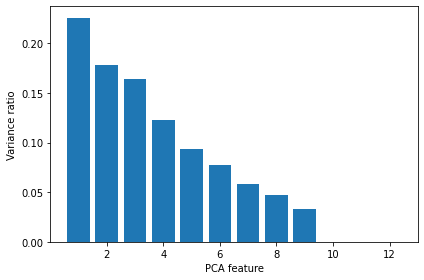

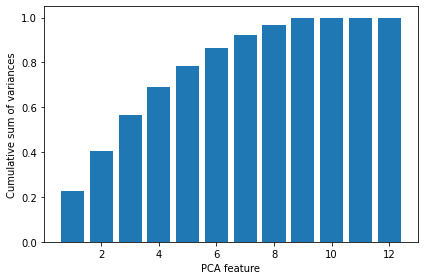

12

Inspecting applied scaler and pca results!


,Mean,Standard Dev
PCA_Feature_1,2.392400e-17,1.646016e+00
PCA_Feature_2,2.392400e-17,1.461235e+00
PCA_Feature_3,-7.974666e-18,1.402931e+00
PCA_Feature_4,-8.572766e-17,1.214804e+00
PCA_Feature_5,2.193033e-17,1.061389e+00
PCA_Feature_6,-2.591766e-17,9.653019e-01
PCA_Feature_7,-2.591766e-17,8.357375e-01
PCA_Feature_8,9.370232e-17,7.492046e-01
PCA_Feature_9,-6.977833e-18,6.271680e-01
PCA_Feature_10,-6.478445e-18,2.763030e-16


After applying pca with a cutoff percentage 0.8% for the cumulative index. Using features 1 to 6
Old shape (891, 12)
New shape (891, 6)

Inspecting data after final scaler applied!


,Mean,Standard Dev
PCA_Feature_1,5.980999e-18,1.0
PCA_Feature_2,2.392400e-17,1.0
PCA_Feature_3,-8.971499e-18,1.0
PCA_Feature_4,-1.993666e-17,1.0
PCA_Feature_5,1.395567e-17,1.0
PCA_Feature_6,-3.189866e-17,1.0


Found past models in directory structure! Attempting to re-initalize models...
/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Auto Clustering/Models/K-Medians/Clusters=7/Center points.pkl
/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Auto Clustering/Models/K-Medians/Clusters=7/K-Medians_Clusters=7.pkl
/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Auto Clustering/Models/K-Medians/Clusters=5/Center points.pkl
/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Auto Clustering/Models/K-Medians/Clusters=5/K-Medians_Clusters=5.pkl
/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Auto Clustering/Models/K

In [25]:
from eflow.auto_modeler import AutoCluster
auto_cluster = AutoCluster(pd.DataFrame(X),
                           dataset_name=dataset_name,
                           dataset_sub_dir="Auto Clustering",
                           overwrite_full_path=None,
                           notebook_mode=True,
                           pca_perc=.8)

In [26]:
auto_cluster.create_dbscan_model(target_clusters_amt=9)

DBScan Cycle Iteration: Finding Max Min Sample   Epsilon Value: 1.0     Highest Silhouette Avg = -inf: : 20it [00:00, 38.93it/s] 
DBScan Cycle Iteration: Finding Max Min Sample   Epsilon Value: 1.0     Highest Silhouette Avg = -inf: : 20it [00:00, 53.59it/s]
DBScan Cycle Iteration: Finding Max Min Sample   Epsilon Value: 1.0     Highest Silhouette Avg = -inf: : 20it [00:00, 57.38it/s]
DBScan Cycle Iteration: Finding Max Min Sample   Epsilon Value: 1.0     Highest Silhouette Avg = -inf: : 20it [00:00, 50.94it/s] 
DBScan Cycle Iteration: Finding Max Min Sample   Epsilon Value: 1.0     Highest Silhouette Avg = -inf: : 20it [00:00, 49.36it/s] 
DBScan Cycle Iteration: Finding Max Min Sample   Epsilon Value: 1.0     Highest Silhouette Avg = -inf: : 20it [00:00, 51.07it/s] 
DBScan Cycle Iteration: Finding Max Min Sample   Epsilon Value: 1.0     Highest Silhouette Avg = -inf: : 20it [00:00, 43.73it/s] 
DBScan Cycle Iteration: Finding Max Min Sample   Epsilon Value: 1.0     Highest Silhouette A

Starting DBScan cycles


DBScan Cycle Iteration: 1   Epsilon Value: 0.4685     Highest Silhouette Avg = 0.8624880713560699: : 83it [00:01, 47.56it/s]
DBScan Cycle: 1 Best Min Sample Found: 14: 100%|██████████| 50/50 [00:00<00:00, 235.23it/s]


----------------
0.468
14
----------------



In [27]:
auto_cluster.get_all_cluster_models()

{'K-Medians_Clusters=7': <pyclustering.cluster.kmedians.kmedians at 0x7fd8c6513130>,
 'K-Medians_Clusters=5': <pyclustering.cluster.kmedians.kmedians at 0x7fd8c66a2a00>,
 'K-Medians_Clusters=4': <pyclustering.cluster.kmedians.kmedians at 0x7fd8c110c670>,
 'K-Medians_Clusters=6': <pyclustering.cluster.kmedians.kmedians at 0x7fd8c66b04f0>,
 'K-Medians_Clusters=3': <pyclustering.cluster.kmedians.kmedians at 0x7fd8c6513f70>,
 'K-Means_Clusters=7': <pyclustering.cluster.kmeans.kmeans at 0x7fd8c6513df0>,
 'K-Means_Clusters=5': <pyclustering.cluster.kmeans.kmeans at 0x7fd8c64fa550>,
 'K-Means_Clusters=4': <pyclustering.cluster.kmeans.kmeans at 0x7fd8c64fa520>,
 'K-Means_Clusters=6': <pyclustering.cluster.kmeans.kmeans at 0x7fd8c64faaf0>,
 'Somsc_Clusters=5': <pyclustering.cluster.somsc.somsc at 0x7fd8c64fa460>,
 'Somsc_Clusters=4': <pyclustering.cluster.somsc.somsc at 0x7fd8c64fa130>,
 'Somsc_Clusters=6': <pyclustering.cluster.somsc.somsc at 0x7fd8c64d7400>,
 'Fuzzy C-Means_Clusters=7': <pycl

In [42]:
from eflow.utils.sys_utils import load_pickle_object
from pyclustering.cluster.dbscan import dbscan
import pickle

# Data that has had pca and scaled
scaled = auto_cluster.get_scaled_data()

# Model instance
dbscan_instance = dbscan(scaled, .07865, 8, True)
dbscan_instance.process()

# Save model to dir
file_dir = 'DBScan.pkl'
list_pickle = open(file_dir, 'wb')
pickle.dump(dbscan_instance,list_pickle)
list_pickle.close()

# Load model in
with open(file_dir, 'rb') as handle:
    load_model = pickle.load(handle)

AttributeError: 'dbscan' object has no attribute '__neighbor_indexes_points'

In [37]:
len(dbscan_instance.get_noise())

597

In [38]:
load_pickle_object("/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Auto Clustering/Models/DBScan/Clusters=9/DBScan_Clusters=9.pkl")

AttributeError: 'dbscan' object has no attribute '__neighbor_indexes_points'